In [1]:
import cv2, pyautogui, glob, random, statistics
import numpy as np
from statistics import mode
import PIL.Image 
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np
from medpy.filter.smoothing import anisotropic_diffusion
from scipy.stats import moment
from sklearn.cluster import KMeans
from sklearn import neighbors as nn
from sklearn.model_selection import train_test_split

 Chargement de la base des donnes des imaages

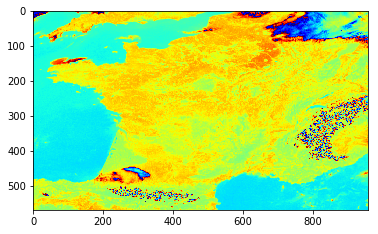

(<matplotlib.image.AxesImage at 0x7f3ba6a8f080>, None)

In [2]:
imagesTif = glob.glob('tif/*.tif')# parcours de la liste de nommes d'immages
N = len(imagesTif)
Images = []# tableau vide pour charger les images 
for i in range(N):# parcourir le nombre des images
    I_Base = PIL.Image.open(imagesTif[i])
    #I_Base = np.asarray(I_Base, np.int8)
    I_Base = np.asanyarray(I_Base, np.uint8)
    Images.append(I_Base)
# Images[5][100][500]
plt.imshow(Images[125], cmap='jet'),plt.show()

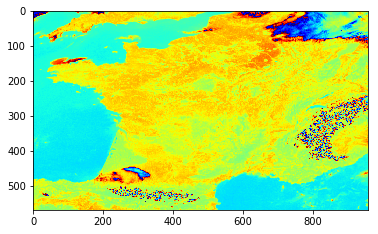

(<matplotlib.image.AxesImage at 0x7f3ba42130b8>, None)

In [3]:
plt.imshow(Images[125], cmap='jet'),plt.show()

Fonction qui trait en un click un cadre de donnees de l'image de taille n*n

In [4]:
def stat_local_Image(Images, i):# Images = base d'images, i numero de l'image a tester 
    def Click_crop(event,x,y,flags,param):
        D_B = [[],[]]; s=0
        if event==cv2.EVENT_LBUTTONDOWN:
            x = pyautogui.position()[0]; y = pyautogui.position()[1]
            D_test = img[x-10:x+10,y-10:y+10]
            if (D_test.size == 0):
                print( 'tableau vide')
            else:
                s = s+1# nbre des lignes qui a le resultat des descripteurs statistique.
                Nobs,MinMax,Moy,Var,SK,Ku = stat.describe(np.ndarray.flatten(D_test))# indices statistiques descriptifs 
                Mode = stat.mode(np.ndarray.flatten(D_test)); 
                D_B[s].append([Moy,Var,SK,Ku,Mode[0]]); # tableau qui prend tous les descripteur statistique de chaque click                
                print(x,',',y,'___',round(Moy,3),'___',round(Var,3),'___',round(SK,3),'____',round(Ku,3),'___',
                      Mode[0],'*****',round(np.mean(D_B[s][0][0]),3),'___',round(np.mean(D_B[s][0][1]),3),'___',
                      round(np.mean(D_B[s][0][2]),3),'____',round(np.mean(D_B[s][0][3]),3))
    img = Images[i]
    cv2.namedWindow('image')
    print('Pos[x, y]_____Moyenne____Variance____Skewness____Kurtosis____Mode__*__MoyG: Moy____Var____SK____Ku')
    cv2.setMouseCallback('image', Click_crop)
    while(1):
        cv2.imshow('image',img)
        k = cv2.waitKey(1) & 0xFF
        if k == ord('m'): mode = not mode
        elif k == 27: break
    cv2.destroyAllWindows()


In [ ]:
stat_local_Image(Images,100)

Pos[x, y]_____Moyenne____Variance____Skewness____Kurtosis____Mode__*__MoyG: Moy____Var____SK____Ku


In [13]:
# courbes avec plt.
#Moyenne, var, sk, ku, mode
D_M = [ [75.682, 2.373, 0.125, -0.320, 75],
        [74.03, 2.395, -0.139, 0.329,74],
        [74.26, 1.271,-0.229,-0.114,72],
        [71.525, 2.651,-0.144, -0.265, 72],
        [69.285, 2.608, -0.229, 0.144, 69],
        [68.575, 3.699, 0.505, 0.423,69],
        [73.828, 1.512, -0.374, 0.00, 74],
        [69.09, 0.674, 0.051, 0.006, 69],
        [69.482, 0.706, 0.017, -0.101,69],
        [69.892,0.723, 0.255,-0.057,70]]
# courbes avec plt.
#Moyenne, var, sk, ku, mode
D_T = [ [70.115, 1.36, 0.269, -0.041, 70],
        [81.125, 2.16, -0.383, -0.332,82],
        [69.148, 0.808,-0.024, -0.07,69],
        [83.99, 329.85, 1.569, +2.119, 76],
        [75.25, 1.115, 0.0, 0.275, 75],
        [83.455, 2.93, -0.501, 0.479,84],
        [77.372, 20.273, 0.936, -0.777, 74],
        [82.808, 1.559, -0.978, 3.066, 83],
        [78.148, 1.798, 0.105, 0.017,79],
        [74.955, 1.795, -0.051,0.537,78]]
# courbes avec plt.
#Moyenne, var, sk, ku, mode
D_N = [[105.26,11.58 , -0.609, 0.108,105],
       [105.31, 14.656, -1.077, 1.291,107],
       [102.26, 12.13, 0.083, -0.469,102],
       [93.868, 10.732, 0.011, -0.058,94],
       [96.445, 8.548, 0, -0.335,96],
       [97.715, 17.006, -0.17, -0.767,100],
       [101.2, 34.339, 0.564, -0.408,98],
       [102.61, 28.745, 0.615, 0.126,99],
       [96.55, 11.747, 0.02, -0.517,96],
       [80.182, 25.032, 1.742, 4.119,78],]
D_M = np.array(D_M); D_T = np.array(D_T); D_N = np.array(D_N)

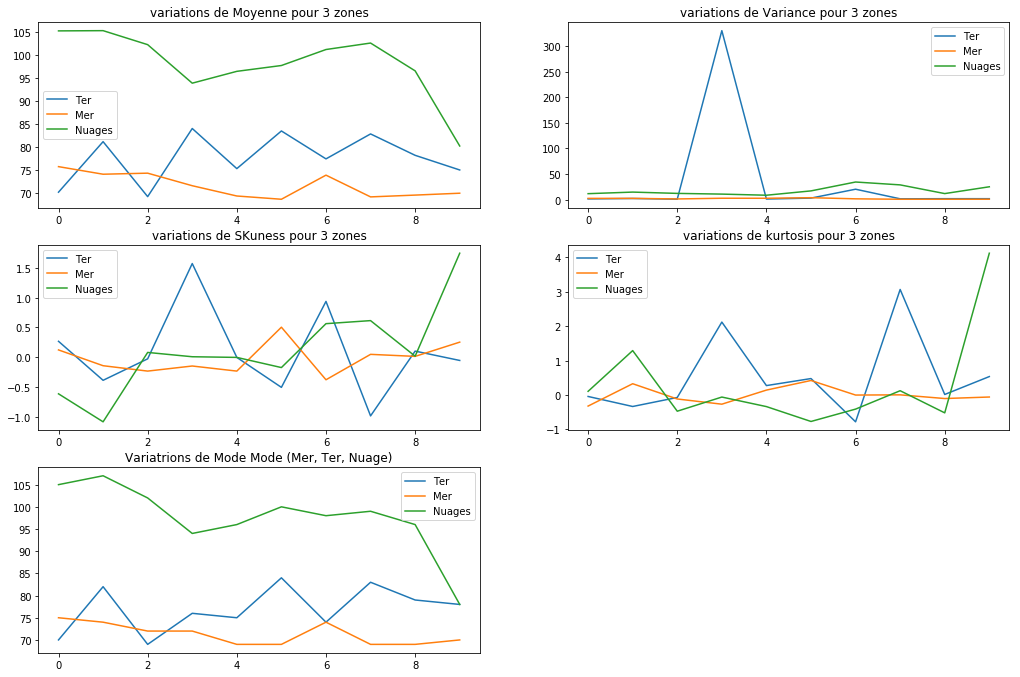

In [46]:
def Zoom(m):
    return plt.gcf().set_size_inches(m*plt.gcf().get_size_inches());
plt.subplot(3,2,1)
plt.plot(D_T[:,0], label="Ter"),plt.plot(D_M[:,0], label="Mer"),plt.plot( D_N[:,0], label="Nuages"),plt.legend()
plt.title("variations de Moyenne pour 3 zones")

plt.subplot(3,2,2)
plt.plot(D_T[:,1], label="Ter"),plt.plot(D_M[:,1], label="Mer"),plt.plot( D_N[:,1], label="Nuages"),plt.legend()
plt.title("variations de Variance pour 3 zones")

plt.subplot(3,2,3)
plt.plot(D_T[:,2], label="Ter"),plt.plot(D_M[:,2], label="Mer"),plt.plot( D_N[:,2], label="Nuages"),plt.legend()
plt.title("variations de SKuness pour 3 zones")

plt.subplot(3,2,4)
plt.plot(D_T[:,3], label="Ter"),plt.plot(D_M[:,3], label="Mer"),plt.plot( D_N[:,3], label="Nuages"),plt.legend()
plt.title("variations de kurtosis pour 3 zones")

plt.subplot(3,2,5)
plt.plot(D_T[:,4], label="Ter"),plt.plot(D_M[:,4], label="Mer"),plt.plot( D_N[:,4], label="Nuages"),plt.legend()
plt.title("Variatrions de Mode Mode (Mer, Ter, Nuage)")
Zoom(2.9)
plt.show()

In [ ]:
plt.plot(D_T[:,0])
plt.plot(D_M[:,0])
plt.plot( D_N[:,0])
plt.title("variations de la moyenne")
plt.show()

In [17]:
stat_local_Image(Images,120)

Pos[x, y]_____Moyenne____Variance____Skewness____Kurtosis____Mode__*__MoyG: Moy____Var____SK____Ku
252 , 551 ___ 105.258 ___ 11.58 ___ -0.609 ____ 0.108 ___ [105] ***** 105.258 ___ 11.58 ___ -0.609 ____ 0.108
265 , 546 ___ 105.31 ___ 14.656 ___ -1.077 ____ 1.291 ___ [107] ***** 105.31 ___ 14.656 ___ -1.077 ____ 1.291
281 , 545 ___ 102.255 ___ 12.13 ___ 0.083 ____ -0.469 ___ [102] ***** 102.255 ___ 12.13 ___ 0.083 ____ -0.469
305 , 549 ___ 93.868 ___ 10.732 ___ 0.011 ____ -0.058 ___ [94] ***** 93.868 ___ 10.732 ___ 0.011 ____ -0.058
298 , 564 ___ 96.445 ___ 8.548 ___ -0.0 ____ -0.335 ___ [96] ***** 96.445 ___ 8.548 ___ -0.0 ____ -0.335
274 , 574 ___ 97.715 ___ 17.006 ___ -0.17 ____ -0.767 ___ [100] ***** 97.715 ___ 17.006 ___ -0.17 ____ -0.767
256 , 577 ___ 101.198 ___ 34.339 ___ 0.564 ____ -0.408 ___ [98] ***** 101.198 ___ 34.339 ___ 0.564 ____ -0.408
237 , 575 ___ 102.61 ___ 28.745 ___ 0.615 ____ 0.126 ___ [99] ***** 102.61 ___ 28.745 ___ 0.615 ____ 0.126
227 , 556 ___ 96.55 ___ 11.74

# Application des test statistique sur tout l'images (morceaux n*n)

In [8]:
N = 1#nombre des images a traiter 
w=2 #.5*5 
#Data_Stat = [[],[]]
Data_Stat = []
for i in range(N):
    for px in range(w, (Images[i].shape[0]-w), 2*w):# parcours des x de l'image
        for py in range(w, (Images[i].shape[1]-w), 2*w):# parcours des y de l'image 
            D_test = Images[i][px-w:px+w, py-w:py+w]
            if (D_test.size == 0):print( 'tableau vide')
            else:
                D_test = np.ndarray.flatten(D_test)
                Mode = stat.mode(D_test); 
                Nobs,MinMax,Moy,Var,SK,Ku = stat.describe(D_test)# indices statistiques descriptifs                
                Data_Stat.append([Moy, Var, SK, Ku, Mode[0]])
                #Data_Stat[i].append([Moy, Var, SK, Ku])   
Data_Stat = np.asarray(Data_Stat) # Data_Stat.shape ==> (67116, 4) pour deux images 
# classification (3K) des donnes statistiques 
clf = KMeans(n_clusters=4, n_init=1, init='k-means++').fit(Data_Stat)

In [11]:
# Test de precision du clasifieur sur le meme element d'apprentissage et qui doit etre == True
print(clf.predict(Data_Stat[1].reshape(1,-1)) == clf.labels_[1])
# un pixel ne doit pas appartient qu'un seul classe parmis les trois
print(clf.labels_[510] == [0,1,2]) # pour des test elle peut pas etre true pour 2 classe 
# Test global de reussit du classifieur qui doit etre egale a 1 
correct = 0
for i in range(len(Data_Stat)):
    predict_me = np.array(Data_Stat[i].astype(float))
    predict_me = predict_me.reshape(-1,len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == clf.labels_[i]:correct += 1
print(correct/len(Data_Stat))

[ True]
[ True False False]
1.0


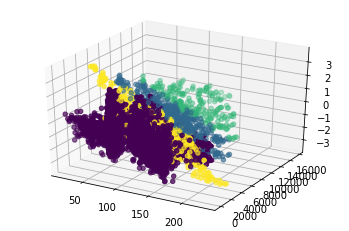

In [18]:
#visualisation de 3 classes en 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Data_Stat[1] = np.int16(Data_Stat[1])
ax.scatter(Data_Stat[:,0], Data_Stat[:,1], Data_Stat[:,2], c=clf.labels_)
plt.show()

In [13]:
def seg_M1(BD, N_im, w, k):
    # k nbre des classes a initialise pour l'algo kmean 
    # N_im: nbre des images a traiter pour l'apprentissage de classification et pour la segmentation  
    # w: unite taille de la cellule(w*2+1, w*2+1) pour la classification et pour la segmentation
    # Clf: classifieur a choisir (Kmean , ou Knn)
    Data_Stat = []; Image = BD[N_im] 
    for px in range(w, (Image.shape[0]-w), 2*w):# parcours des x de l'image
        for py in range(w, (Image.shape[1]-w), 2*w):# parcours des y de l'image 
            D_test = Image[px-w:px+w, py-w:py+w]# case de donnees a analuser
            D_test = np.ndarray.flatten(D_test)
            Mode = stat.mode(D_test); Nobs,MinMax,Moy,Var,SK,Ku = stat.describe(D_test)# indices statistiques descriptifs                
            Data_Stat.append([Moy, Var, SK, Ku, Mode[0]])
    Data_Stat = np.asarray(Data_Stat) # Data_Stat.shape ==> (n, 5) pour deux images 
    # classification (K en classes ) des donnes statistiques
    clf = KMeans(n_clusters = k, n_init=1, init='k-means++').fit(Data_Stat)# app
    # Segmentation#----------------------------
    D_test_seg = []; Im = np.zeros((Image.shape[0],Image.shape[1])); # image resultat
    for px in range(w,(Image.shape[0]-w), 2*w):# parcours des x de l'image
        for py in range(w, (Image.shape[1]-w), 2*w):# parcours des y de l'image 
            D_t_Im = np.ndarray.flatten(Image[px-w:px+w, py-w:py+w])
            Mode = stat.mode(D_t_Im); M = Mode[0]; Nobs,MinMax,Moy,Var,SK,Ku = stat.describe(D_t_Im);
            D = np.array([Moy, Var, SK, Ku, M]).reshape(1, -1)
            for i in range(k):
                if(clf.predict(D) == i):
                    Im[px-w:px+w, py-w:py+w] = round(255/abs(i+1))# coloration du case
    Im = np.asanyarray(Im, np.uint8)
    plt.subplot(1,2,1),plt.imshow(BD[N_im]),plt.axis('off'),plt.gcf().set_size_inches(2*plt.gcf().get_size_inches());
    plt.subplot(1,2,2),plt.imshow(Im),plt.axis('off'),plt.gcf().set_size_inches(2*plt.gcf().get_size_inches());
    plt.show()

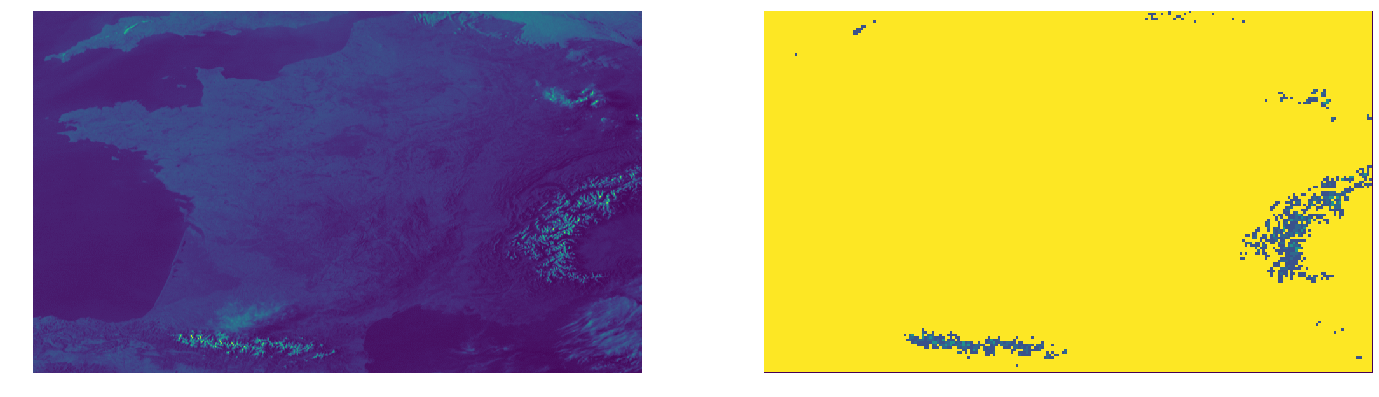

In [5]:
seg_M1(Images, N_im = 20, w = 2, k = 4)

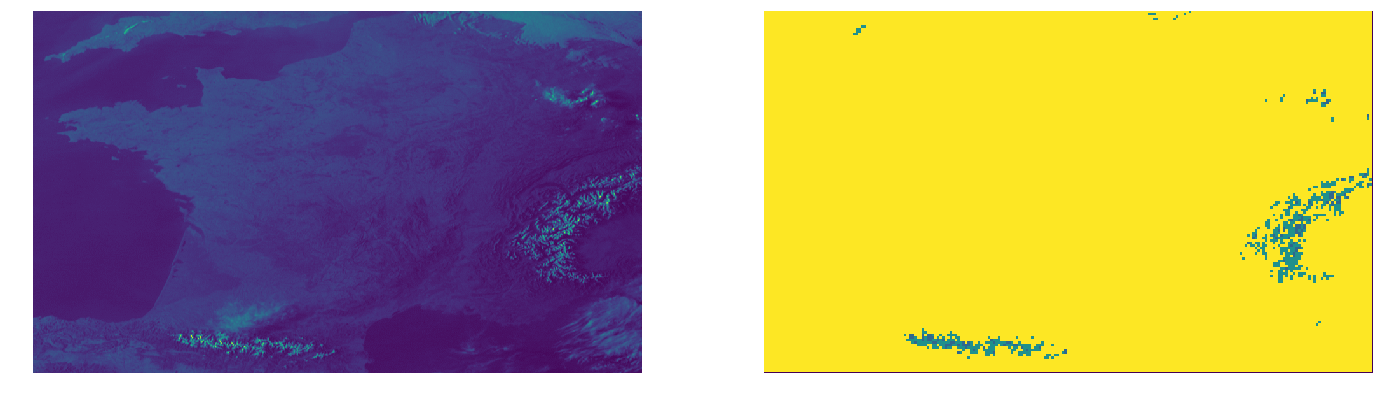

In [83]:
# avec 3 classes et une fenetre de traitelent de taille 5*5
seg_M1(Images,N_im = 20, w = 2, k = 3)

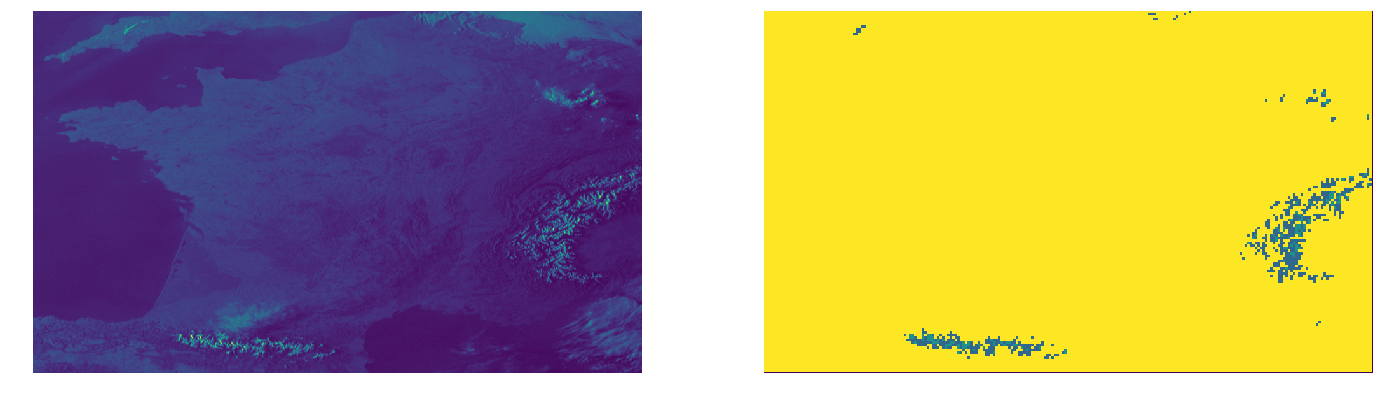

In [84]:
# avec 3 classes et un fenetre de taille 3*3
seg_M1(Images,N_im = 20, w = 1, k = 3)

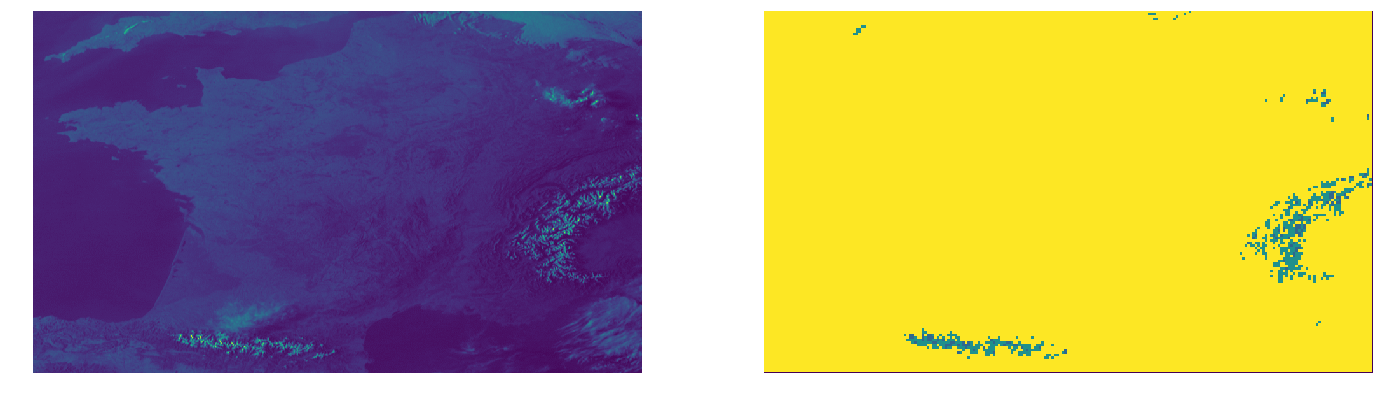

In [85]:
# 3 classes et un fenetre de taille 7*7 // image N° 20
seg_M1(Images,N_im = 20, w = 3, k = 3)

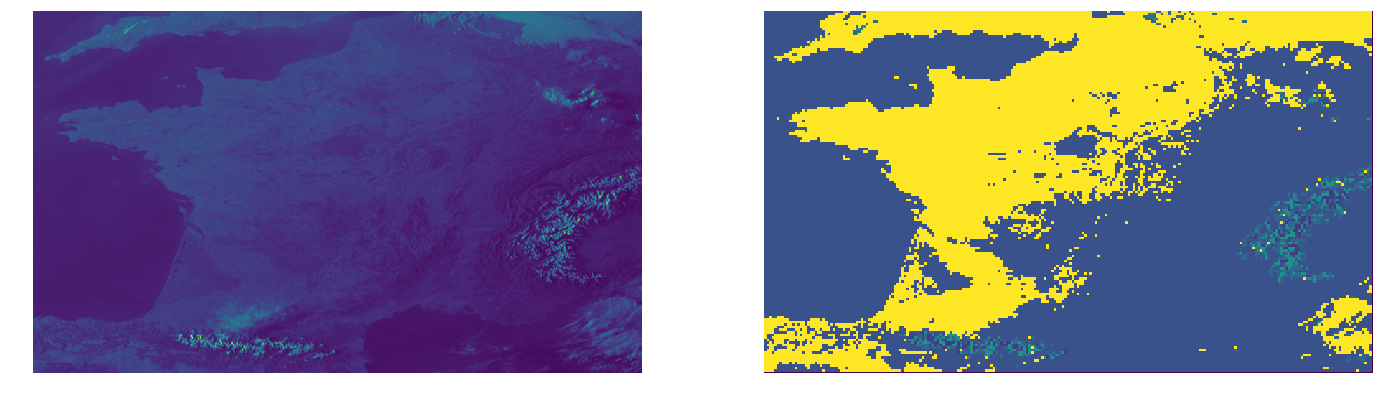

In [87]:
seg_M1(Images,N_im = 20, w = 2, k = 6)

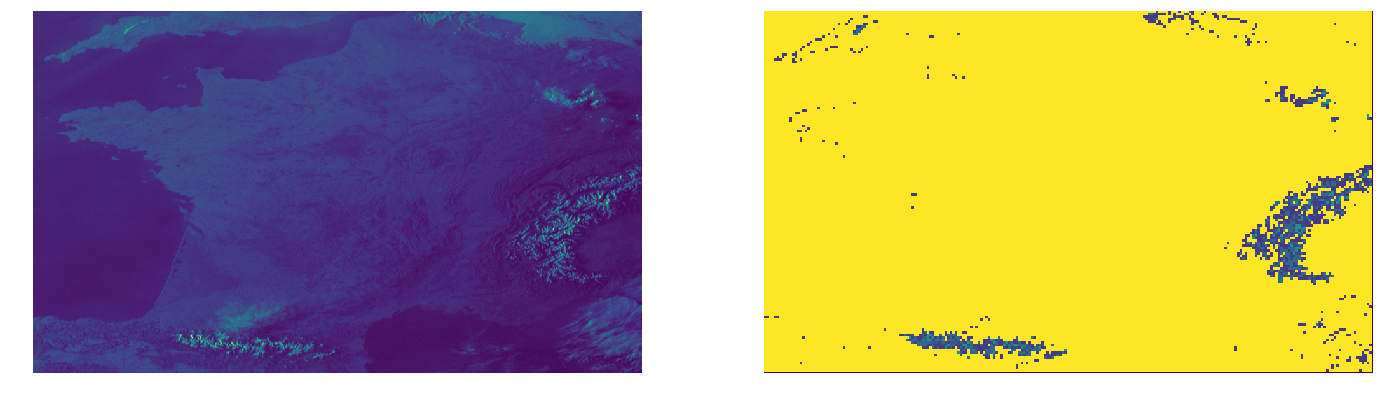

In [88]:
seg_M1(Images,N_im = 20, w = 1, k = 6)

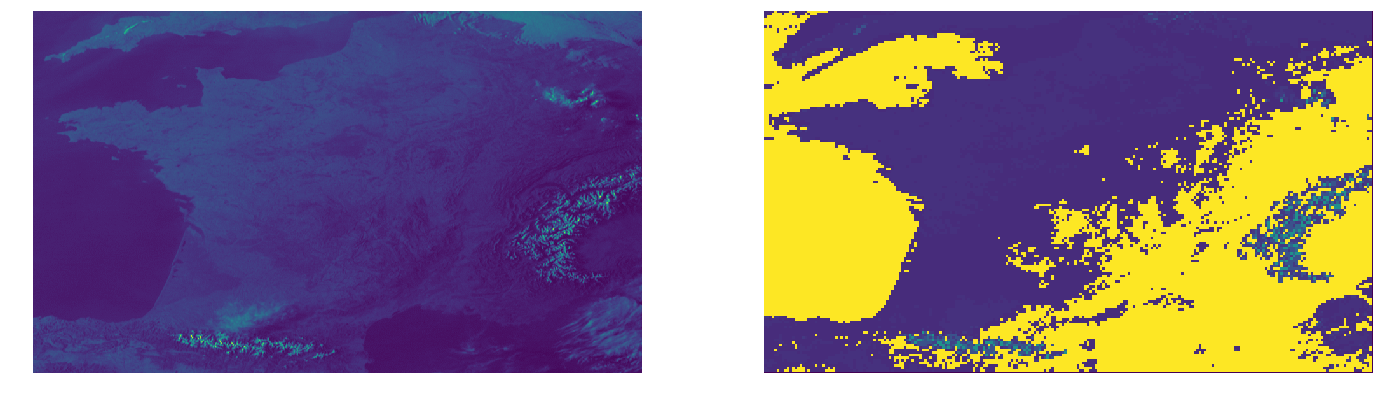

In [89]:
seg_M1(Images,N_im = 20, w = 1, k = 8)

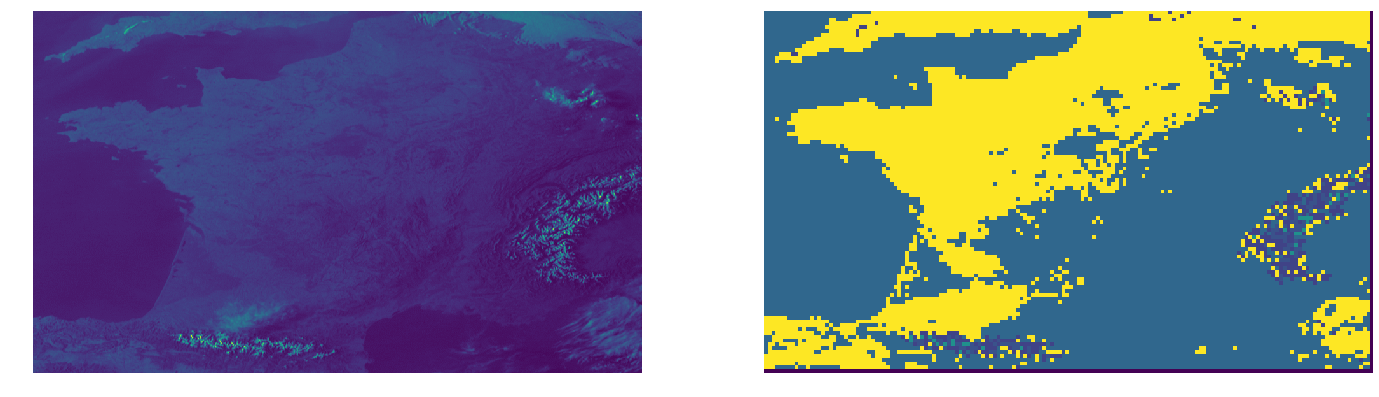

In [14]:
seg_M1(Images,N_im = 20, w = 3, k = 5)

In [9]:
imagesTif = glob.glob('tif/*.tif')# parcours de la liste de nommes d'immages
N = len(imagesTif); m = []
for i in range(round(N/1)):
    I_Base = PIL.Image.open(imagesTif[i])
    I_Base = np.asanyarray(I_Base, np.uint8)
    #I_Base = cv2.equalizeHist(I_Base)
    #plt.imshow(I_Base, cmap='gray'),plt.show()
    m.append(np.mean(I_Base))
print(np.max(m))

160.4294729516903
